In [1]:
import pandas as pd                       # Importing Libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
price= pd.read_csv('CSUSHPISA.csv')    # House Prices
price

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563
...,...,...
433,2023-02-01,296.958
434,2023-03-01,298.210
435,2023-04-01,300.214
436,2023-05-01,302.657


In [3]:
unemp_rate=pd.read_csv('U2RATE.csv')    # Unemployement
unemp_rate

,DATE,U2RATE
0,1967-01-01,1.6
1,1967-02-01,1.6
2,1967-03-01,1.5
3,1967-04-01,1.6
4,1967-05-01,1.6
...,...,...
675,2023-04-01,1.6
676,2023-05-01,1.8
677,2023-06-01,1.7
678,2023-07-01,1.6


In [4]:
#New Houses for Sale by Stage of Construction, Not Started
constr_not_startd= pd.read_csv('NHFSEPNTS.csv')  # thousands of units
constr_not_startd

,DATE,NHFSEPNTS
0,1999-01-01,38.0
1,1999-02-01,38.0
2,1999-03-01,36.0
3,1999-04-01,41.0
4,1999-05-01,39.0
...,...,...
290,2023-03-01,90.0
291,2023-04-01,93.0
292,2023-05-01,94.0
293,2023-06-01,97.0


In [5]:
#New Houses for Sale by Stage of Construction, Under Construction
undr_constrtn = pd.read_csv('NHFSEPUCS.csv')   
undr_constrtn

,DATE,NHFSEPUCS
0,1999-01-01,178.0
1,1999-02-01,180.0
2,1999-03-01,185.0
3,1999-04-01,180.0
4,1999-05-01,184.0
...,...,...
290,2023-03-01,273.0
291,2023-04-01,267.0
292,2023-05-01,266.0
293,2023-06-01,262.0


In [6]:
# New Houses for Sale by Stage of Construction, Completed
cnstr_cmplt= pd.read_csv('NHFSEPCS.csv')
cnstr_cmplt

,DATE,NHFSEPCS
0,1999-01-01,68.0
1,1999-02-01,67.0
2,1999-03-01,68.0
3,1999-04-01,69.0
4,1999-05-01,72.0
...,...,...
290,2023-03-01,70.0
291,2023-04-01,70.0
292,2023-05-01,66.0
293,2023-06-01,69.0


In [7]:
df_under_compl= pd.merge(cnstr_cmplt,undr_constrtn,on='DATE',how='inner')    #joining 
df_under_compl

,DATE,NHFSEPCS,NHFSEPUCS
0,1999-01-01,68.0,178.0
1,1999-02-01,67.0,180.0
2,1999-03-01,68.0,185.0
3,1999-04-01,69.0,180.0
4,1999-05-01,72.0,184.0
...,...,...,...
290,2023-03-01,70.0,273.0
291,2023-04-01,70.0,267.0
292,2023-05-01,66.0,266.0
293,2023-06-01,69.0,262.0


In [8]:
df_not_unemp =pd.merge(constr_not_startd,unemp_rate,on='DATE',how='inner')
df_not_unemp

,DATE,NHFSEPNTS,U2RATE
0,1999-01-01,38.0,2.0
1,1999-02-01,38.0,2.0
2,1999-03-01,36.0,1.9
3,1999-04-01,41.0,1.9
4,1999-05-01,39.0,1.9
...,...,...,...
290,2023-03-01,90.0,1.8
291,2023-04-01,93.0,1.6
292,2023-05-01,94.0,1.8
293,2023-06-01,97.0,1.7


In [9]:
join_df = pd.merge(df_under_compl,df_not_unemp,on='DATE',how='inner')
join_df

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE
0,1999-01-01,68.0,178.0,38.0,2.0
1,1999-02-01,67.0,180.0,38.0,2.0
2,1999-03-01,68.0,185.0,36.0,1.9
3,1999-04-01,69.0,180.0,41.0,1.9
4,1999-05-01,72.0,184.0,39.0,1.9
...,...,...,...,...,...
290,2023-03-01,70.0,273.0,90.0,1.8
291,2023-04-01,70.0,267.0,93.0,1.6
292,2023-05-01,66.0,266.0,94.0,1.8
293,2023-06-01,69.0,262.0,97.0,1.7


In [10]:
join_data_df = pd.merge(join_df,price,on='DATE',how='inner')

In [11]:
#renaming column name for better understing the data & aligning Data to center(for better view data)
join_data_df.rename(columns = {'NHFSEPCS':'Const_complt', 'NHFSEPUCS':'un_constr','NHFSEPNTS':'Cnstr_not_Strtd','U2RATE':'Unemploy_Rate','CSUSHPISA':'Price_fact'}, inplace = True)
join_data_df

,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999-01-01,68.0,178.0,38.0,2.0,93.207
1,1999-02-01,67.0,180.0,38.0,2.0,93.670
2,1999-03-01,68.0,185.0,36.0,1.9,94.216
3,1999-04-01,69.0,180.0,41.0,1.9,94.784
4,1999-05-01,72.0,184.0,39.0,1.9,95.343
...,...,...,...,...,...,...
289,2023-02-01,69.0,278.0,90.0,1.7,296.958
290,2023-03-01,70.0,273.0,90.0,1.8,298.210
291,2023-04-01,70.0,267.0,93.0,1.6,300.214
292,2023-05-01,66.0,266.0,94.0,1.8,302.657


In [12]:
join_data_df.describe()   #calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,81.894558,184.258503,52.615646,3.123129,171.417405
std,40.068019,67.904529,22.246952,1.585905,49.479289
min,31.000000,70.000000,22.000000,1.500000,93.207000
25%,56.000000,123.250000,36.250000,2.025000,140.161000
50%,75.000000,185.000000,47.000000,2.600000,164.796500
75%,87.000000,230.000000,66.500000,3.700000,189.398250
max,194.000000,338.000000,102.000000,13.200000,304.817000


In [13]:
join_data_df.info()  # prints information about the data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             294 non-null    object 
 1   Const_complt     294 non-null    float64
 2   un_constr        294 non-null    float64
 3   Cnstr_not_Strtd  294 non-null    float64
 4   Unemploy_Rate    294 non-null    float64
 5   Price_fact       294 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.1+ KB


In [14]:
join_data_df.duplicated().sum()   # in the DataFrame are duplicated and not

0

In [15]:
join_data_df.isnull().sum()    #Cheecking there null value in DataSet

DATE               0
Const_complt       0
un_constr          0
Cnstr_not_Strtd    0
Unemploy_Rate      0
Price_fact         0
dtype: int64

In [16]:
join_data_df.nunique()         #checking the number of unique values for each column.

DATE               294
Const_complt       109
un_constr          162
Cnstr_not_Strtd     73
Unemploy_Rate       55
Price_fact         294
dtype: int64

# Exploratory data analysis (EDA)

In [17]:
join_data_df['year'] = pd.DatetimeIndex(join_data_df['DATE']).year     # Creating New columm with Year name 

In [18]:
join_data_df

,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year
0,1999-01-01,68.0,178.0,38.0,2.0,93.207,1999
1,1999-02-01,67.0,180.0,38.0,2.0,93.670,1999
2,1999-03-01,68.0,185.0,36.0,1.9,94.216,1999
3,1999-04-01,69.0,180.0,41.0,1.9,94.784,1999
4,1999-05-01,72.0,184.0,39.0,1.9,95.343,1999
...,...,...,...,...,...,...,...
289,2023-02-01,69.0,278.0,90.0,1.7,296.958,2023
290,2023-03-01,70.0,273.0,90.0,1.8,298.210,2023
291,2023-04-01,70.0,267.0,93.0,1.6,300.214,2023
292,2023-05-01,66.0,266.0,94.0,1.8,302.657,2023


In [19]:
join_df_mean = join_data_df.groupby(by='year', as_index=False).mean()  # Mean of the Data and group By year 
join_df_mean

,year,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999,71.500000,183.000000,41.333333,1.875000,96.365333
1,2000,84.250000,180.250000,39.500000,1.766667,104.768417
2,2001,77.583333,182.333333,41.833333,2.416667,113.179500
3,2002,82.500000,199.000000,46.000000,3.183333,122.278500
4,2003,80.833333,213.916667,53.666667,3.316667,133.731000
5,2004,89.916667,243.250000,62.166667,2.850000,150.440083
6,2005,106.750000,279.500000,81.416667,2.433333,171.736750
7,2006,144.083333,318.166667,91.083333,2.191667,183.447417
8,2007,185.416667,267.166667,78.500000,2.291667,179.918833
9,2008,179.083333,190.416667,56.000000,3.116667,164.057167


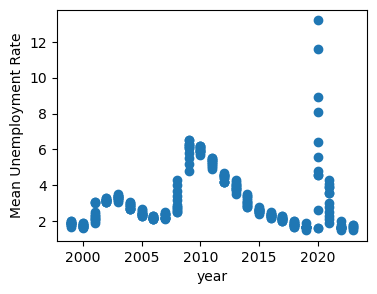

In [20]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.Unemploy_Rate)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

## the first peak in unemployment rate came in the year 2021 and started to decrease slowly from 2022 to 2023 became lowest in the year 2023

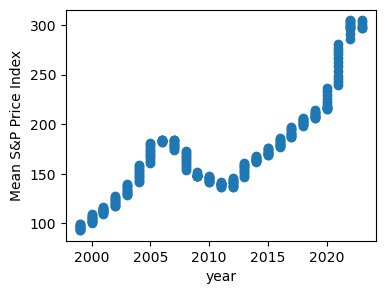

In [21]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.Price_fact)
plt.xlabel('year')
plt.ylabel('Mean S&P Price Index')
plt.show()

### The price of house kept on increasing from year 2003 to 2005 and started gradually decreasing from 2007 to 2012 ( in the same year the unemployment rate started increasing ), after 2020 there was large difference in the price of house.

In [22]:
df_max=join_data_df.groupby(by='year', as_index=False).max()   # max values of each factors on the yearly basis
df_max

,year,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999,1999-12-01,77.0,191.0,47.0,2.0,99.844
1,2000,2000-12-01,90.0,188.0,42.0,1.9,109.140
2,2001,2001-12-01,82.0,191.0,45.0,3.1,116.456
3,2002,2002-12-01,86.0,204.0,52.0,3.3,127.623
4,2003,2003-12-01,86.0,232.0,61.0,3.5,140.179
5,2004,2004-12-01,97.0,257.0,70.0,3.1,159.330
6,2005,2005-12-01,110.0,306.0,95.0,2.7,180.910
7,2006,2006-12-01,166.0,338.0,100.0,2.3,184.364
8,2007,2007-12-01,194.0,285.0,85.0,2.5,184.598
9,2008,2008-12-01,191.0,227.0,69.0,4.3,173.132


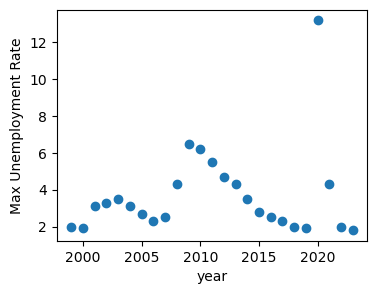

In [23]:
plt.figure(figsize=(4,3))
plt.scatter(df_max.year,df_max.Unemploy_Rate)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

### Maximum Unemploylent Rate was seen in the year 2021

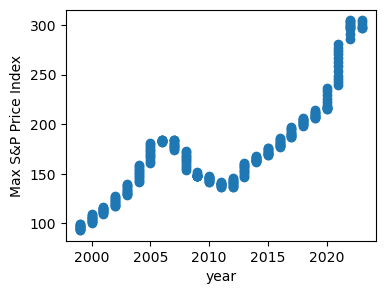

In [24]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.Price_fact)
plt.xlabel('year')
plt.ylabel('Max S&P Price Index')
plt.show()

In [25]:
df_min=join_data_df.groupby(by='year', as_index=False).min()  # min values of each factors on the yearly basis
df_min

,year,DATE,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact
0,1999,1999-01-01,67.0,175.0,36.0,1.7,93.207
1,2000,2000-01-01,79.0,170.0,37.0,1.6,100.551
2,2001,2001-01-01,75.0,170.0,39.0,1.9,109.846
3,2002,2002-01-01,77.0,190.0,40.0,3.1,117.143
4,2003,2003-01-01,77.0,202.0,51.0,3.1,128.460
5,2004,2004-01-01,82.0,231.0,54.0,2.7,141.646
6,2005,2005-01-01,102.0,264.0,70.0,2.3,161.288
7,2006,2006-01-01,113.0,290.0,80.0,2.1,182.320
8,2007,2007-01-01,169.0,234.0,72.0,2.1,174.342
9,2008,2008-01-01,166.0,145.0,42.0,2.5,153.618


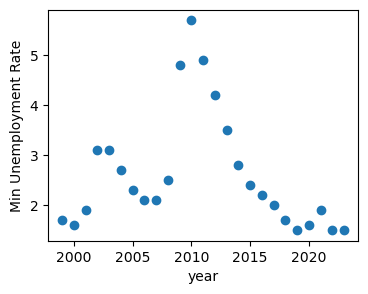

In [26]:
plt.figure(figsize=(4,3))
plt.scatter(df_min.year,df_min.Unemploy_Rate)
plt.xlabel('year')
plt.ylabel('Min Unemployment Rate')
plt.show()

### Minimum Unemployment Rate was seen in the year 2019

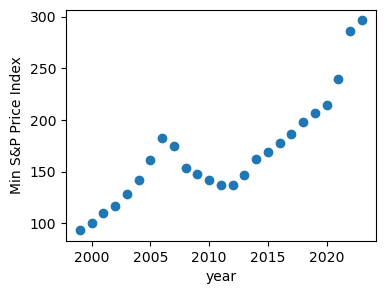

In [27]:
plt.figure(figsize=(4,3))
plt.scatter(df_min.year,df_min.Price_fact)
plt.xlabel('year')
plt.ylabel('Min S&P Price Index')
plt.show()

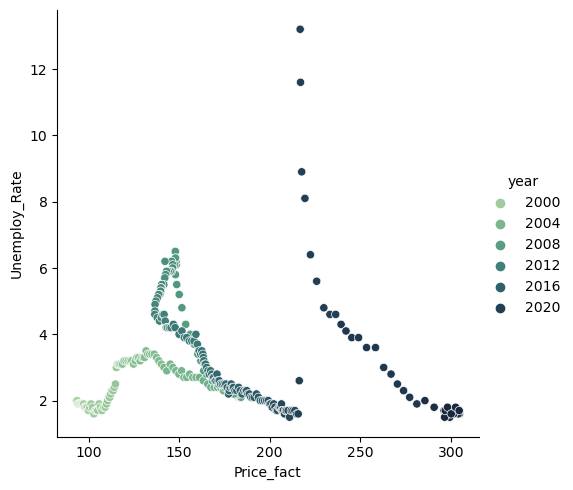

In [28]:
sns.relplot(x="Price_fact", y="Unemploy_Rate", hue="year", palette="ch:r=-.5,l=.75", data=join_data_df);

In [29]:
data_new=pd.read_csv('HNFSEPUSSA.csv')  # Total number of houses for sale
data_new.head(12)

,DATE,HNFSEPUSSA
0,1963-01-01,235.0
1,1963-02-01,238.0
2,1963-03-01,242.0
3,1963-04-01,246.0
4,1963-05-01,248.0
5,1963-06-01,253.0
6,1963-07-01,254.0
7,1963-08-01,264.0
8,1963-09-01,257.0
9,1963-10-01,274.0


In [30]:
data_new.describe()

,HNFSEPUSSA
count,727.000000
mean,313.906465
std,85.437649
min,142.000000
25%,253.500000
50%,312.000000
75%,362.000000
max,572.000000


In [31]:
data_new['year']=  pd.DatetimeIndex(data_new['DATE']).year 

In [32]:
data_new1=data_new.groupby(by='year',as_index=False).mean()
data_new1

,year,HNFSEPUSSA
0,1963,252.750000
1,1964,258.750000
2,1965,236.583333
3,1966,211.666667
4,1967,187.583333
...,...,...
56,2019,330.333333
57,2020,303.833333
58,2021,349.166667
59,2022,439.833333


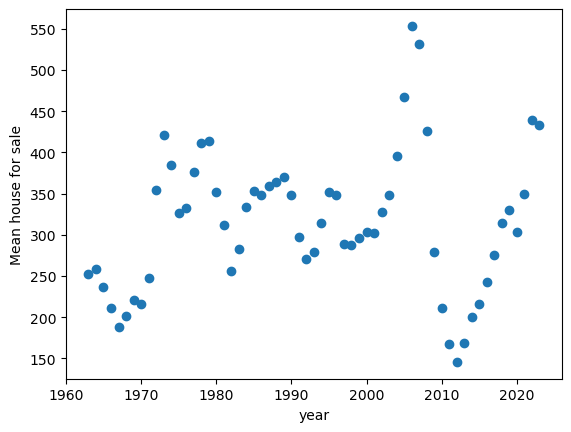

In [33]:
plt.scatter(data_new1.year,data_new1.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Mean house for sale')
plt.show()

### Maximum number of houses were available in 2007 and least in 2012

In [34]:
data_max=data_new1.groupby(by='year',as_index=False).max()
data_max

,year,HNFSEPUSSA
0,1963,252.750000
1,1964,258.750000
2,1965,236.583333
3,1966,211.666667
4,1967,187.583333
...,...,...
56,2019,330.333333
57,2020,303.833333
58,2021,349.166667
59,2022,439.833333


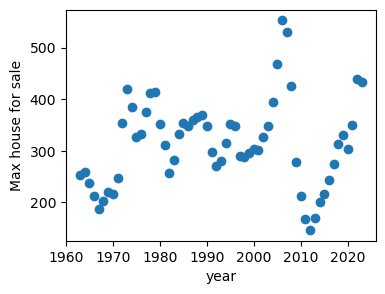

In [35]:
plt.figure(figsize=(4,3))
plt.scatter(data_max.year,data_max.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Max house for sale')
plt.show()

In [36]:
data_min=data_new1.groupby(by='year',as_index=False).min()
data_min

,year,HNFSEPUSSA
0,1963,252.750000
1,1964,258.750000
2,1965,236.583333
3,1966,211.666667
4,1967,187.583333
...,...,...
56,2019,330.333333
57,2020,303.833333
58,2021,349.166667
59,2022,439.833333


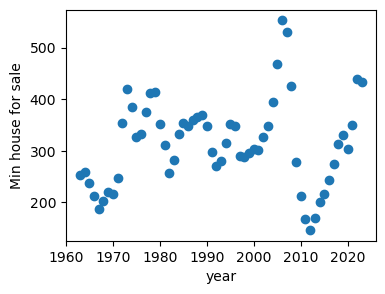

In [37]:
plt.figure(figsize=(4,3))
plt.scatter(data_min.year,data_min.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Min house for sale')
plt.show()

In [38]:
join_data_df.corr()

,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year
Const_complt,1.000000,0.369077,0.259954,-0.033380,-0.189004,-0.439836
un_constr,0.369077,1.000000,0.923796,-0.525463,0.449616,-0.061550
Cnstr_not_Strtd,0.259954,0.923796,1.000000,-0.396526,0.686356,0.218150
Unemploy_Rate,-0.033380,-0.525463,-0.396526,1.000000,-0.169878,0.050090
Price_fact,-0.189004,0.449616,0.686356,-0.169878,1.000000,0.843770
year,-0.439836,-0.061550,0.218150,0.050090,0.843770,1.000000


In [39]:
data_df_new=pd.merge(data_new,join_data_df,on='DATE',how ='inner')

In [40]:
data_df_new

,DATE,HNFSEPUSSA,year_x,Const_complt,un_constr,Cnstr_not_Strtd,Unemploy_Rate,Price_fact,year_y
0,1999-01-01,284.0,1999,68.0,178.0,38.0,2.0,93.207,1999
1,1999-02-01,285.0,1999,67.0,180.0,38.0,2.0,93.670,1999
2,1999-03-01,289.0,1999,68.0,185.0,36.0,1.9,94.216,1999
3,1999-04-01,290.0,1999,69.0,180.0,41.0,1.9,94.784,1999
4,1999-05-01,295.0,1999,72.0,184.0,39.0,1.9,95.343,1999
...,...,...,...,...,...,...,...,...,...
289,2023-02-01,437.0,2023,69.0,278.0,90.0,1.7,296.958,2023
290,2023-03-01,433.0,2023,70.0,273.0,90.0,1.8,298.210,2023
291,2023-04-01,430.0,2023,70.0,267.0,93.0,1.6,300.214,2023
292,2023-05-01,426.0,2023,66.0,266.0,94.0,1.8,302.657,2023


In [41]:
data_df_new=data_df_new.drop(columns=['year_x','year_y','Const_complt','un_constr','Cnstr_not_Strtd'],axis=1)
data_df_new

,DATE,HNFSEPUSSA,Unemploy_Rate,Price_fact
0,1999-01-01,284.0,2.0,93.207
1,1999-02-01,285.0,2.0,93.670
2,1999-03-01,289.0,1.9,94.216
3,1999-04-01,290.0,1.9,94.784
4,1999-05-01,295.0,1.9,95.343
...,...,...,...,...
289,2023-02-01,437.0,1.7,296.958
290,2023-03-01,433.0,1.8,298.210
291,2023-04-01,430.0,1.6,300.214
292,2023-05-01,426.0,1.8,302.657


In [42]:
data_df_new.rename(columns={'HNFSEPUSSA':'ttl_homes_avlbl_for_sale'},inplace=True)
data_df_new

,DATE,ttl_homes_avlbl_for_sale,Unemploy_Rate,Price_fact
0,1999-01-01,284.0,2.0,93.207
1,1999-02-01,285.0,2.0,93.670
2,1999-03-01,289.0,1.9,94.216
3,1999-04-01,290.0,1.9,94.784
4,1999-05-01,295.0,1.9,95.343
...,...,...,...,...
289,2023-02-01,437.0,1.7,296.958
290,2023-03-01,433.0,1.8,298.210
291,2023-04-01,430.0,1.6,300.214
292,2023-05-01,426.0,1.8,302.657


In [43]:
data_df_new.drop(columns=['DATE'],axis=1,inplace=True)

In [44]:
data_df_new

,ttl_homes_avlbl_for_sale,Unemploy_Rate,Price_fact
0,284.0,2.0,93.207
1,285.0,2.0,93.670
2,289.0,1.9,94.216
3,290.0,1.9,94.784
4,295.0,1.9,95.343
...,...,...,...
289,437.0,1.7,296.958
290,433.0,1.8,298.210
291,430.0,1.6,300.214
292,426.0,1.8,302.657


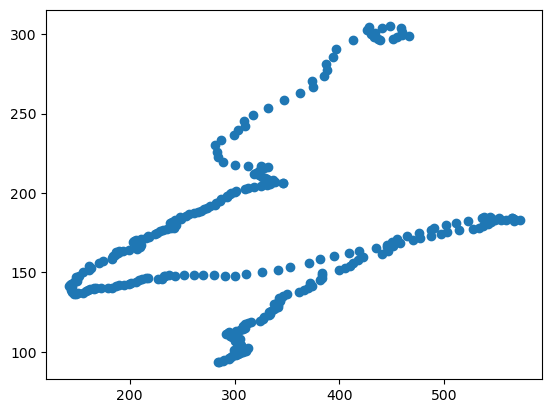

In [45]:
plt.scatter(data_df_new.ttl_homes_avlbl_for_sale,data_df_new.Price_fact)


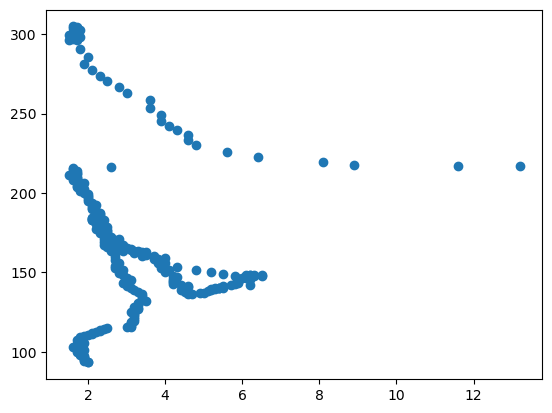

In [46]:
plt.scatter(data_df_new.Unemploy_Rate,data_df_new.Price_fact)


## Building Data Science Model

In [47]:
X=data_df_new.drop(columns=['Price_fact'],axis=1)
Y=data_df_new['Price_fact']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg =LinearRegression()

In [51]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [52]:
Y_predict =lin_reg.predict(x_test)
Y_predict

array([153.41606285, 172.37906649, 167.7940575 , 163.1885028 ,
       176.69664417, 172.82896734, 178.72432773, 185.62325703,
       171.28809403, 156.31359967, 192.23420933, 170.10797781,
       143.98557452, 173.14863302, 172.14680434, 177.76533069,
       171.47404406, 213.15803869, 171.14497565, 151.90687822,
       151.15785739, 182.40605453, 168.26798453, 156.61097941,
       210.5244527 , 143.84245614, 170.86814162, 171.92568516,
       171.46290109, 171.82713866, 156.25196256, 171.92568516,
       177.01630985, 155.70769723, 156.12590941, 166.26258692,
       175.48657952, 159.31246193, 166.04668845, 191.20835447,
       201.15908195, 175.01265248, 171.62830542, 146.25492296,
       198.20583028, 159.04573217, 188.55422277, 212.23247057,
       176.37697849, 172.68584896, 144.32752614, 175.46255334,
       192.11163666, 194.99977074, 159.81703895, 171.45349836,
       193.66539317, 147.0373727 , 212.23247057])

In [53]:
from sklearn.metrics import r2_score

In [54]:
score=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    yprd=lr.predict(x_test)
    score.append(r2_score(y_test,yprd))

In [55]:
import numpy as np
np.argmax(score)

346

In [56]:
score[np.argmax(score)]

0.1922218021173141

### Since the realtion between dependent and independent variable is not linear LR model is not giving good result Therefor we are using Random forest regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(x_train, y_train) 

RandomForestRegressor(max_depth=9, random_state=0)

In [58]:
Y_pred = regressor1.predict(x_test)

r2_score(y_test,Y_pred)

0.7087528973730306

In [59]:
scoree=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(x_train, y_train) 
    yprd=regressor.predict(x_test)
    scoree.append(r2_score(y_test,yprd))

In [60]:
np.argmax(scoree)

193

In [61]:
scoree[np.argmax(scoree)]

0.935544507957901

In [63]:
!pip install -U notebook-as-pdf
!pyppeteer-install

     -------------------------------------- 83.4/83.4 kB 671.0 kB/s eta 0:00:00
     -------------------------------------- 232.6/232.6 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 2.9 MB/s eta 0:00:00


[INFO] Starting Chromium download.

  0%|          | 0.00/137M [00:00<?, ?b/s]
  0%|          | 20.5k/137M [00:00<19:28, 117kb/s]
  0%|          | 51.2k/137M [00:00<19:27, 117kb/s]
  0%|          | 81.9k/137M [00:00<19:20, 118kb/s]
  0%|          | 133k/137M [00:00<11:42, 195kb/s] 
  0%|          | 164k/137M [00:00<11:38, 196kb/s]
  0%|          | 256k/137M [00:01<06:24, 356kb/s]
  0%|          | 328k/137M [00:01<05:11, 438kb/s]
  0%|          | 481k/137M [00:01<03:13, 704kb/s]
  0%|          | 614k/137M [00:01<02:37, 866kb/s]
  1%|          | 860k/137M [00:01<01:45, 1.29Mb/s]
  1%|          | 1.19M/137M [00:01<01:14, 1.83Mb/s]
  1%|1         | 1.60M/137M [00:01<00:56, 2.40Mb/s]
  2%|1         | 2.12M/137M [00:01<00:44, 3.06Mb/s]
  2%|1         | 2.63M/137M [00:01<00:37, 3.61Mb/s]
  2%|2         | 3.07M/137M [00:02<00:35, 3.79Mb/s]
  3%|2         | 3.46M/137M [00:02<00:36, 3.61Mb/s]
  3%|2         | 3.83M/137M [00:02<00:45, 2.96Mb/s]
  3%|3         | 4.56M/137M [00:02<00:33, 4.00Mb/s]
